In [2]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="darkgrid")

In [4]:
data = pd.read_pickle('cleaned_data')

In [10]:
data.dtypes

gender                                 int64
SeniorCitizen                          int64
Partner                                int64
Dependents                             int64
tenure                                 int64
MultipleLines                          int64
OnlineSecurity                         int64
OnlineBackup                           int64
DeviceProtection                       int64
TechSupport                            int64
StreamingTV                            int64
StreamingMovies                        int64
PaperlessBilling                       int64
MonthlyCharges                       float64
TotalCharges                         float64
Churn                                  int64
HasPhoneService                        int64
HasInternetService                     int64
InternetService_DSL                    uint8
InternetService_Fiber optic            uint8
Contract_Month-to-month                uint8
Contract_One year                      uint8
Contract_T

In [18]:
not_cat_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

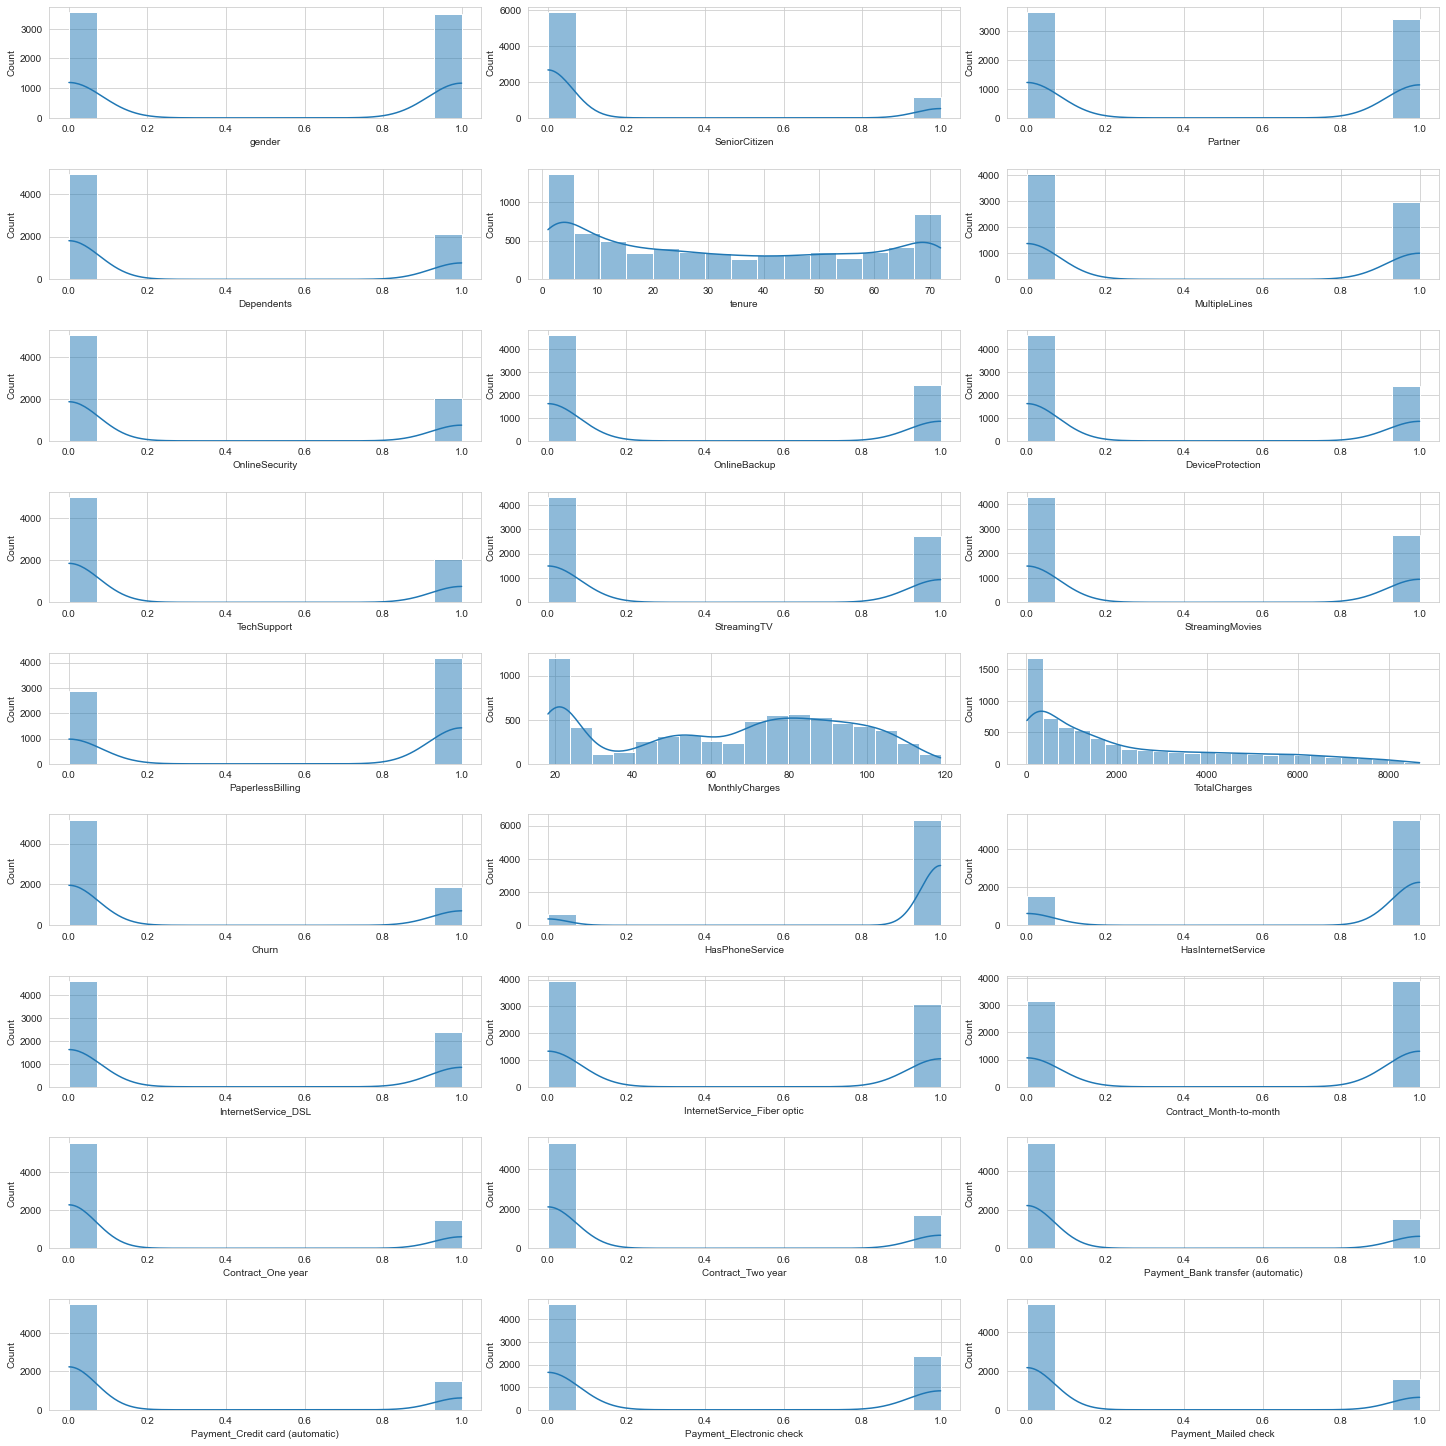

In [17]:
fig, axs = plt.subplots(9,3, figsize=(20,20)) # some disbalance
index = 0
axs = axs.flatten()
for c in data.columns:
    sns.histplot(data=data, x=c, kde=True, ax=axs[index])
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
    index+=1

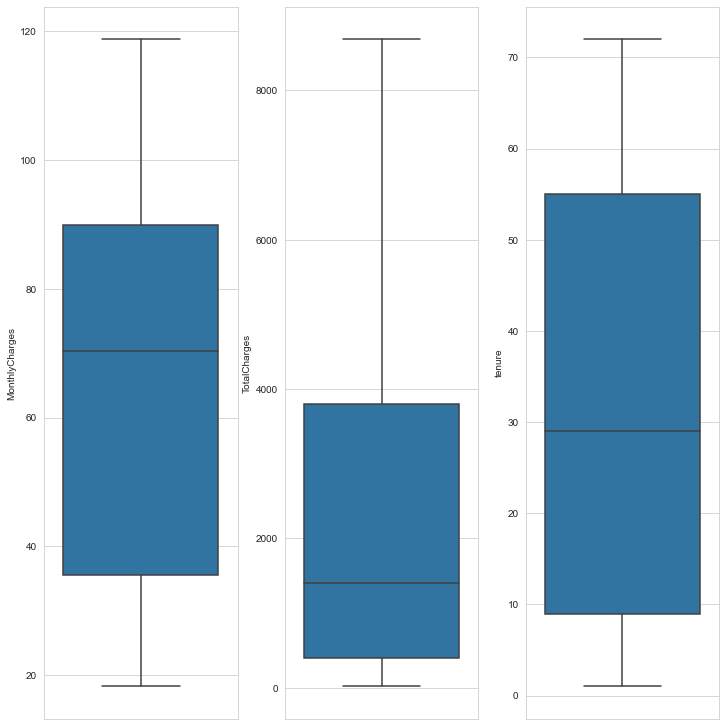

In [21]:
fig, axs = plt.subplots(1,3, figsize=(10, 10))
index = 0
axs = axs.flatten()
for c in not_cat_cols:
    sns.boxplot(y=c, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0) # seems not outliers

<AxesSubplot:>

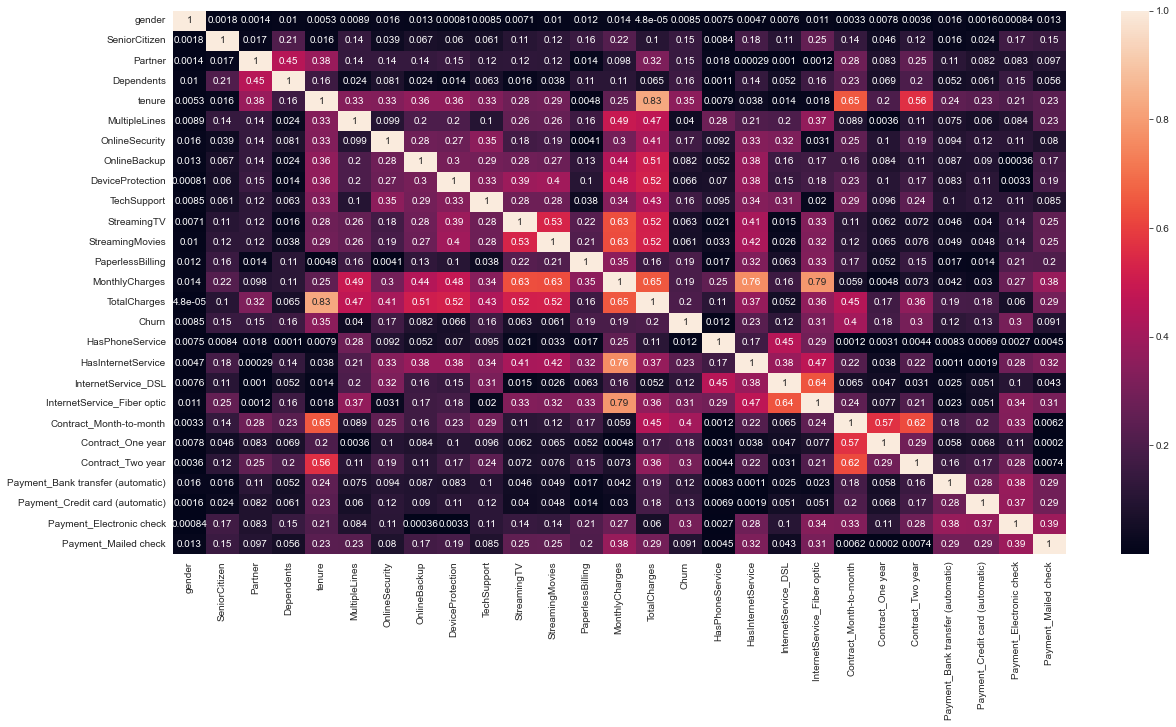

In [22]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(), annot=True) # seems not very useful

In [5]:
y = data['Churn']
x = data[[c for c in data.columns if c != 'Churn']]

In [6]:
# Chi-Squared Feature Selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2

In [7]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x, y)

SelectKBest(k='all', score_func=<function chi2 at 0x000002172EE4C4C0>)

In [10]:
kbest_scores = pd.DataFrame()

In [11]:
kbest_scores['feature'] = x.columns

In [12]:
kbest_scores['chi2'] = fs.scores_

In [13]:
fs2 = SelectKBest(score_func=mutual_info_classif, k='all')
fs2.fit(x, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x000002172F176670>)

In [14]:
kbest_scores['mutual_info_classif'] = fs2.scores_

In [15]:
kbest_scores

,feature,chi2,mutual_info_classif
0,gender,0.259116,0.002414
1,SeniorCitizen,133.482766,0.013935
2,Partner,81.857769,0.005576
3,Dependents,131.271509,0.011139
4,tenure,16377.328093,0.076695
5,MultipleLines,6.514651,0.009815
6,OnlineSecurity,147.165601,0.015377
7,OnlineBackup,31.209832,0.000000
8,DeviceProtection,20.216007,0.000000
9,TechSupport,135.439602,0.013533


In [16]:
kbest_scores.nlargest(5, 'chi2')

,feature,chi2,mutual_info_classif
14,TotalCharges,629630.810349,0.043391
4,tenure,16377.328093,0.076695
13,MonthlyCharges,3653.074681,0.048806
19,Contract_Month-to-month,516.714004,0.088354
21,Contract_Two year,486.223101,0.057203


In [17]:
kbest_scores.nlargest(5, 'mutual_info_classif')

,feature,chi2,mutual_info_classif
19,Contract_Month-to-month,516.714004,0.088354
4,tenure,16377.328093,0.076695
21,Contract_Two year,486.223101,0.057203
13,MonthlyCharges,3653.074681,0.048806
18,InternetService_Fiber optic,372.082851,0.043756


In [25]:
kbest_scores['corr'] = x.corrwith(y).abs().to_list()

In [26]:
kbest_scores

,feature,chi2,mutual_info_classif,corr
0,gender,0.259116,0.002414,0.008545
1,SeniorCitizen,133.482766,0.013935,0.150541
2,Partner,81.857769,0.005576,0.149982
3,Dependents,131.271509,0.011139,0.163128
4,tenure,16377.328093,0.076695,0.354049
5,MultipleLines,6.514651,0.009815,0.040033
6,OnlineSecurity,147.165601,0.015377,0.171270
7,OnlineBackup,31.209832,0.000000,0.082307
8,DeviceProtection,20.216007,0.000000,0.066193
9,TechSupport,135.439602,0.013533,0.164716


In [ ]:
# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/